<a href="https://colab.research.google.com/github/anjanidwilestari/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np
import math
import os
import glob

**Tugas No 3 : Membuat histogram citra menggunakan gambar lena.jpg**

400 400


<BarContainer object of 256 artists>

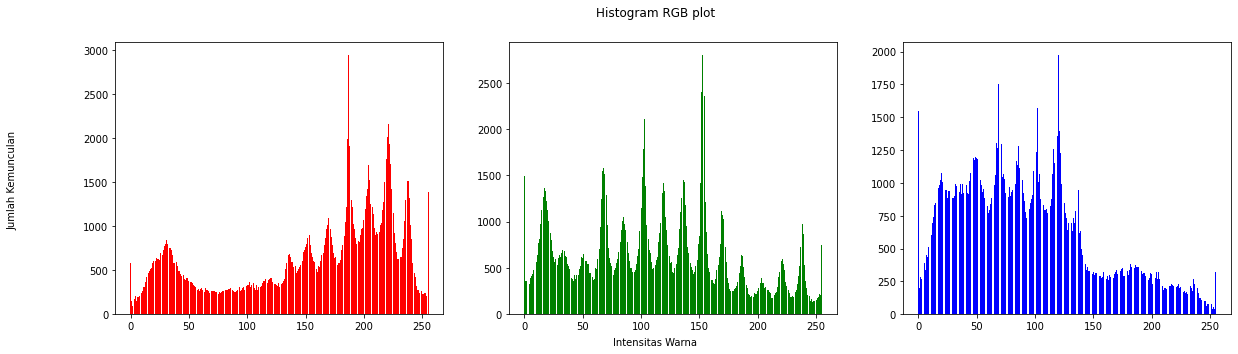

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)
print(height, width)

blue = [0]*256
green = [0]*256
red = [0]*256

for x in range(0,height):
  for y in range(0,width):
    blue[img[x][y][0]] += 1
    green[img[x][y][1]] += 1
    red[img[x][y][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=False)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

**Tugas No 4 : Membuat histogram citra yang sama seperti tugas no 3 akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu "histogram".**

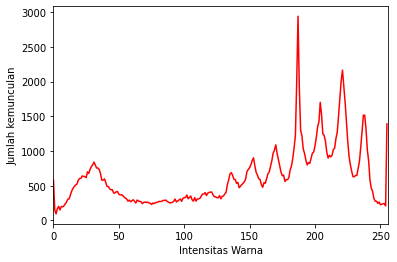

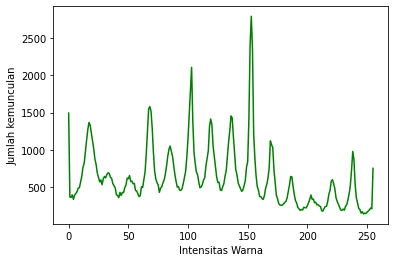

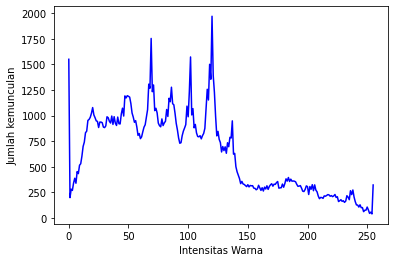

In [4]:
# Membuat Histogram Image
colors = ("r","g","b")
channel_ids = (2, 1, 0)

# Membuat Histogram Plot
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

**Tugas No 5 : Membuta histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization (Gunakan gambar lena_lc.jpg)**

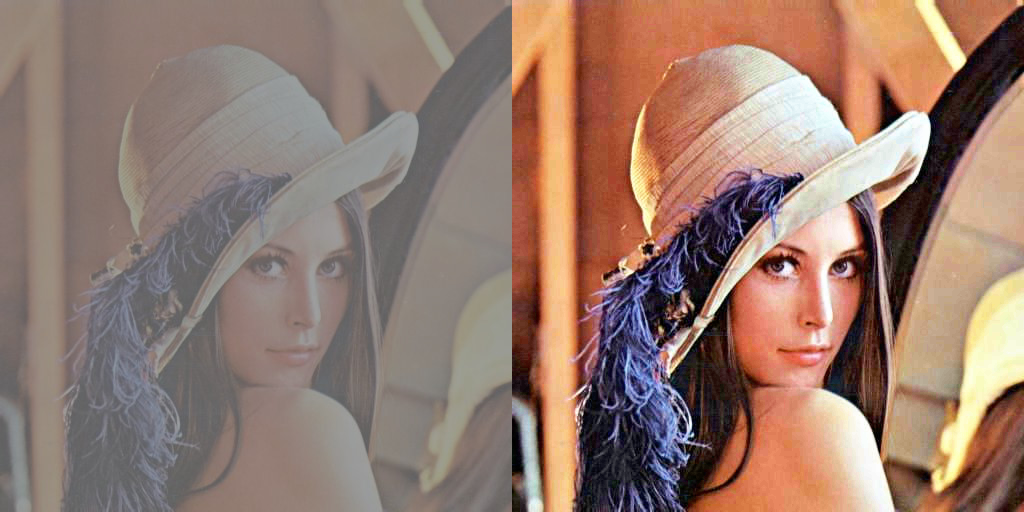

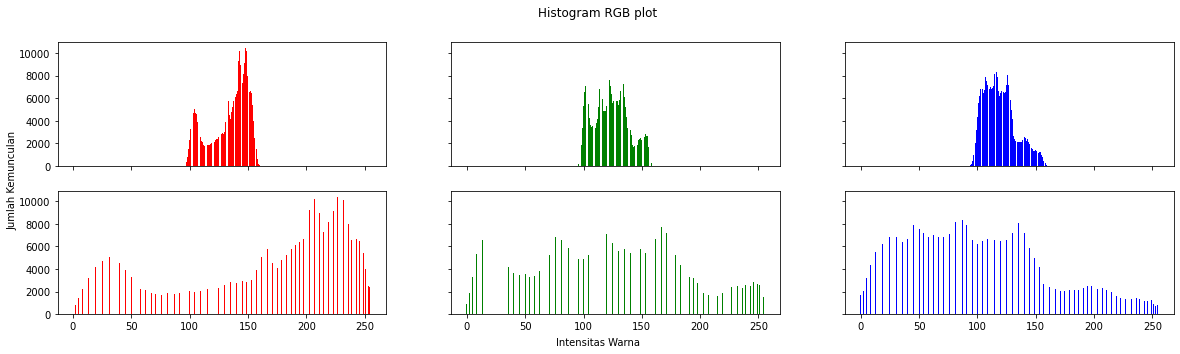

In [5]:
#histogram equalization manual 
img = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/lena_lc.jpg')

def histogram(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for x in range(0,height) : 
    for y in range(0,width) :
      ax[0][img[x][y][0]] += 1 
      ax[1][img[x][y][1]] += 1
      ax[2][img[x][y][2]] += 1 
  return ax

histogram_asli = histogram(img)

#convert to Numpy array 
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)
#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
#STEP 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())
# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]
# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array
equal_histogram = histogram(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(red, green, blue) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histogram_asli[2], color='red') 
  axs[0,1].bar(names, histogram_asli[1], color='green') 
  axs[0,2].bar(names, histogram_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histogram[2], color='red') 
  axs[1,1].bar(names, equal_histogram[1], color='green')
  axs[1,2].bar(names, equal_histogram[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histogram_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histogram[2], color='gray')

**Tugas No 6 : Membuat histogram citra yang sama seperti tugas no 5 akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu "equalizeHist"**

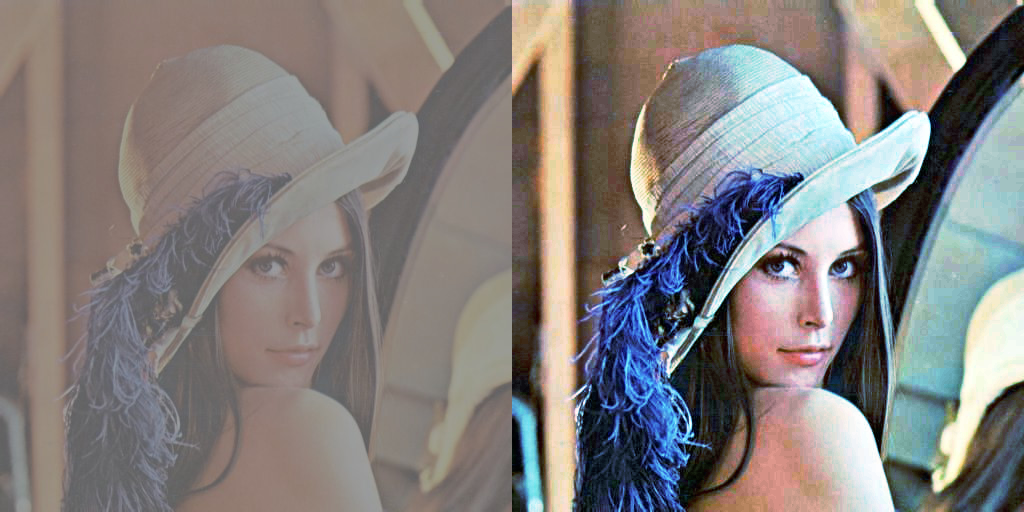

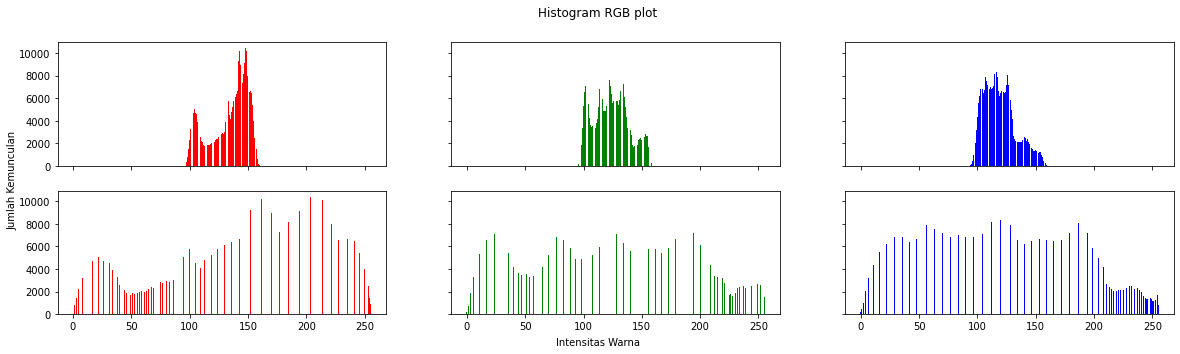

In [6]:
# Histogram equalization using library
img = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/lena_lc.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['B', 'G', 'R']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histogram = histogram(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='red')
  axs[0,1].bar(names, histogram_asli[1], color='green')
  axs[0,2].bar(names, histogram_asli[0], color='blue')
  axs[1,0].bar(names, equal_histogram[2], color='red')
  axs[1,1].bar(names, equal_histogram[1], color='green')
  axs[1,2].bar(names, equal_histogram[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='gray')
  axs[0,1].bar(names, equal_histogram[2], color='gray')

**Tugas No 7 : Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih (Gunakan gambar lena.jpg)**

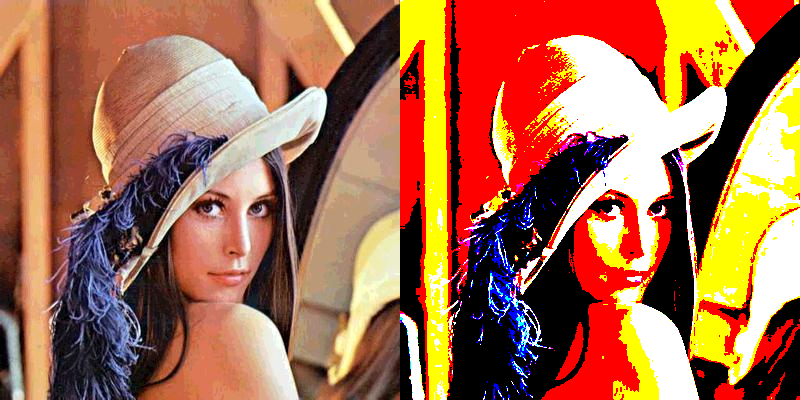

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/lena.jpg')

def colorMapping (red, green, blue):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    redDiff = red - warnaPallette[i][0]
    greenDiff = green - warnaPallette[i][1]
    blueDiff = blue - warnaPallette[i][2]
    distance = redDiff*redDiff + greenDiff*greenDiff + blueDiff*blueDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = img
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for x in range(0, img_16jt.shape[0]):
  for y in range(0, img_16jt.shape[1]):
    baru = colorMapping(img_16jt[x, y, 0], img_16jt[x, y, 1], img_16jt[x, y, 2])
    img_8[x, y] = warnaPallette[baru]
    
final_frame = cv.hconcat((img_16jt, img_8))
cv2_imshow(final_frame)

**Tugas No 8 : Lakukanlah proses dithering Floyd and Steinberg (Gunakan 
gambar lena.jpg)**

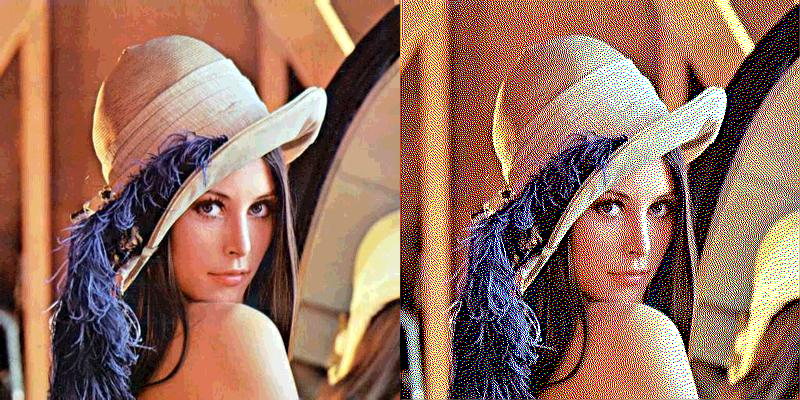

In [8]:
# Proses dithering Floyd and Steinberg 

input_image = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/lena.jpg')
output_image = input_image.copy()

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(img, jarakPixel):
    # mengambil dimensi gambar
    h = img.shape[0]
    w = img.shape[1]
     
    # akses pixel
    for y in range(0, h-1):
        for x in range(1, w-1):
            # jarak pixel tetangga
            old_b = img[y, x, 0]
            old_g = img[y, x, 1]
            old_r = img[y, x, 2]
            
            # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
            new_b = np.round(jarakPixel * old_b/255.0) * (255/jarakPixel)
            new_g = np.round(jarakPixel * old_g/255.0) * (255/jarakPixel)
            new_r = np.round(jarakPixel * old_r/255.0) * (255/jarakPixel)

            img[y, x, 0] = new_b
            img[y, x, 1] = new_g
            img[y, x, 2] = new_r

            # Menghitung kuantisasi error untuk masuk rumus
            quant_error_b = old_b - new_b
            quant_error_g = old_g - new_g
            quant_error_r = old_r - new_r

            # implementasi rumus dithering Floyd and Steinberg
            img[y, x+1, 0] = minmax(img[y, x+1, 0] + quant_error_b * 7 / 16.0)
            img[y, x+1, 1] = minmax(img[y, x+1, 1] + quant_error_g * 7 / 16.0)
            img[y, x+1, 2] = minmax(img[y, x+1, 2] + quant_error_r * 7 / 16.0)
            
            img[y+1, x-1, 0] = minmax(img[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            img[y+1, x-1, 1] = minmax(img[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            img[y+1, x-1, 2] = minmax(img[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


            img[y+1, x, 0] = minmax(img[y+1, x, 0] + quant_error_b * 5 / 16.0)
            img[y+1, x, 1] = minmax(img[y+1, x, 1] + quant_error_g * 5 / 16.0)
            img[y+1, x, 2] = minmax(img[y+1, x, 2] + quant_error_r * 5 / 16.0)


            img[y+1, x+1, 0] = minmax(img[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            img[y+1, x+1, 1] = minmax(img[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            img[y+1, x+1, 2] = minmax(img[y+1, x+1, 2] + quant_error_r * 1 / 16.0)

    return img

output_image = dithering_color(output_image, 1)
final_frame = cv.hconcat((input_image, output_image))
cv2_imshow(final_frame)

**Tugas No 9 :Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram 
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil 
histogram equalization implementasikan proses dithering Floyd and Steinberg**

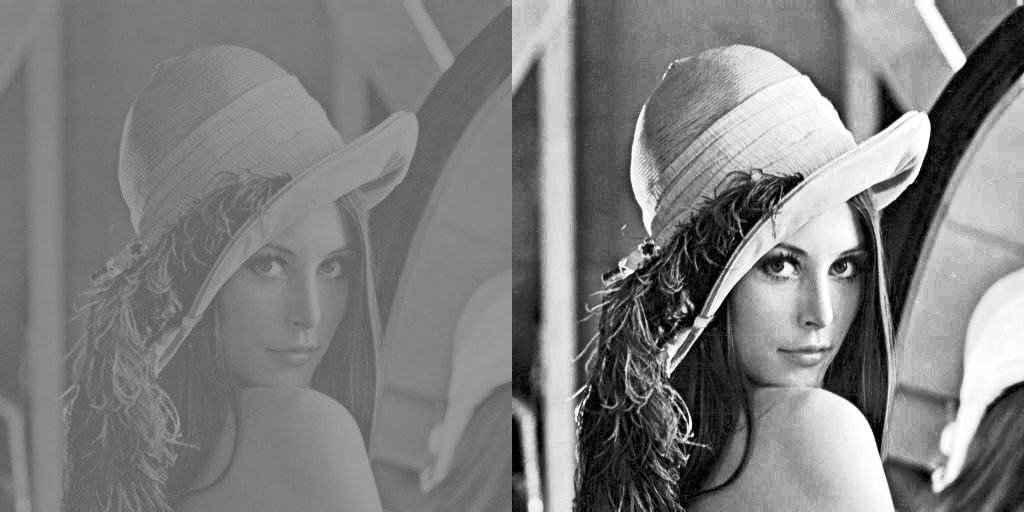

In [9]:
#histogram equalization manual 
img = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/lena_lc.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY) # Convert to grayscale

### Read on grayscale + equalize + show ###
img = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/lena_lc.jpg', 0)
eq_img=cv.equalizeHist(img)
final_frame = cv.hconcat((gray_img, eq_img))
cv2_imshow(final_frame)

Dengan melewati histogram equalization

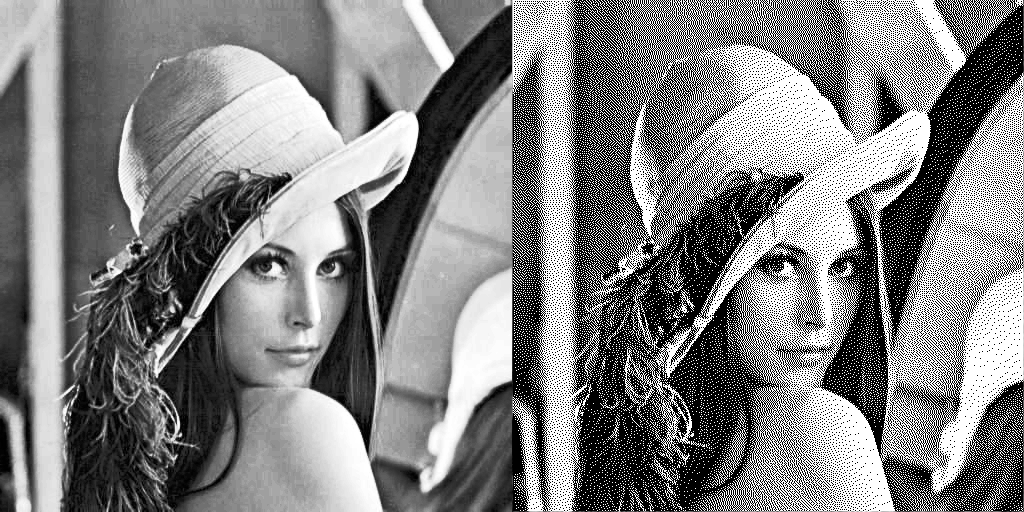

In [10]:
output_image = eq_img.copy()

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(img, jarakPixel):
    # mengambil dimensi gambar
    h = img.shape[0]
    w = img.shape[1]
     
    # akses pixel
    for y in range(0, h-1):
        for x in range(1, w-1):
            # jarak pixel tetangga
            old = img[y, x]
            
            # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
            new = np.round(jarakPixel * old/255.0) * (255/jarakPixel)

            img[y, x] = new

            # Menghitung kuantisasi error untuk masuk rumus
            quant_error = old - new

            # implementasi rumus dithering Floyd and Steinberg
            img[y, x+1] = minmax(img[y, x+1] + quant_error * 7 / 16.0)
            
            img[y+1, x-1] = minmax(img[y+1, x-1] + quant_error * 3 / 16.0)

            img[y+1, x] = minmax(img[y+1, x] + quant_error * 5 / 16.0)

            img[y+1, x+1] = minmax(img[y+1, x+1] + quant_error * 1 / 16.0)
    return img

output_image = dithering_color(output_image, 1)
final_frame = cv.hconcat((eq_img, output_image))
cv2_imshow(final_frame)

Tanpa melewati histogram equalization

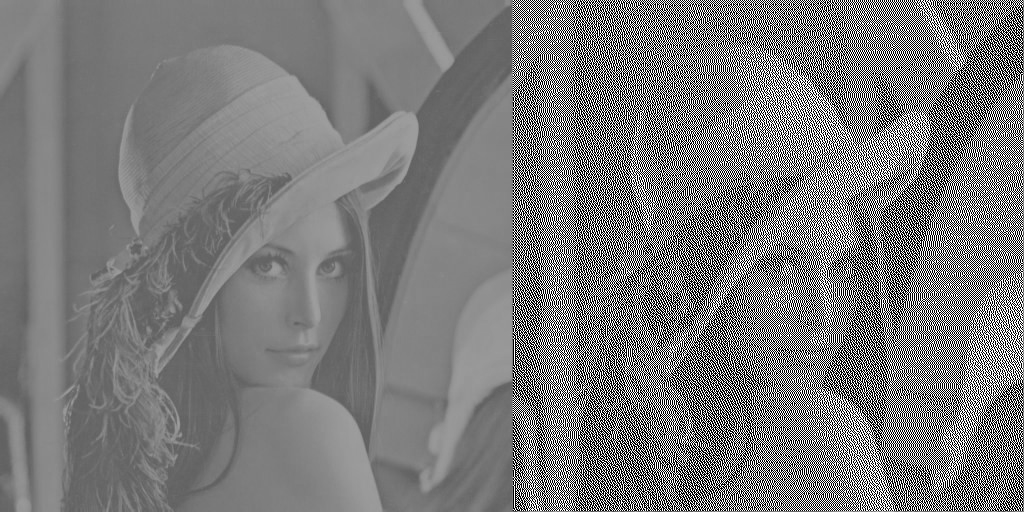

In [11]:
output_image = gray_img.copy()

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(img, jarakPixel):
    # mengambil dimensi gambar
    h = img.shape[0]
    w = img.shape[1]
     
    # akses pixel
    for y in range(0, h-1):
        for x in range(1, w-1):
            # jarak pixel tetangga
            old = img[y, x]
            
            # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
            new = np.round(jarakPixel * old/255.0) * (255/jarakPixel)

            img[y, x] = new

            # Menghitung kuantisasi error untuk masuk rumus
            quant_error = old - new

            # implementasi rumus dithering Floyd and Steinberg
            img[y, x+1] = minmax(img[y, x+1] + quant_error * 7 / 16.0)
            
            img[y+1, x-1] = minmax(img[y+1, x-1] + quant_error * 3 / 16.0)

            img[y+1, x] = minmax(img[y+1, x] + quant_error * 5 / 16.0)

            img[y+1, x+1] = minmax(img[y+1, x+1] + quant_error * 1 / 16.0)
    return img

output_image = dithering_color(output_image, 1)
final_frame = cv.hconcat((gray_img, output_image))
cv2_imshow(final_frame)